In [1]:
from gaia_tools import query
import gaia_tools.load as gload
from astroquery.gaia import Gaia
import matplotlib
#matplotlib.use("AGG")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
import pyexcel
from astropy import units as u
from astropy.coordinates import SkyCoord

import sklearn
from sklearn import cluster
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Circle
#from matplotlib import patches

%pylab inline

import pywt
from galpy.util import bovy_plot

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Populating the interactive namespace from numpy and matplotlib


In [2]:
# csv-pd set up for DBSCANN
GlobClust_Log_ra_dec = pd.read_csv('~/GlobClust_ra-dec.csv')
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[0:0,"r_t"]
GlobClust_Log_radec = GlobClust_Log_ra_dec.loc[0:0,"RA":"DEC"]
GlobClust_Log_ID = GlobClust_Log_ra_dec.loc[0:0,"ID"]
GlobClust_Log_r_c = GlobClust_Log_ra_dec.loc[0:0,"r_c"]
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[0:0,"r_t"]

coord_ra_dec_deg=[]
coord_ra_dec = SkyCoord(GlobClust_Log_radec.loc[:,"RA"], GlobClust_Log_radec.loc[:,"DEC"], frame='icrs')

GlobClust_Log_dec = coord_ra_dec.dec.deg
GlobClust_Log_ra = coord_ra_dec.ra.deg

coord_ra_dec_deg=[]
coord_ra_dec = SkyCoord(GlobClust_Log_radec.loc[:,"RA"], GlobClust_Log_radec.loc[:,"DEC"], frame='icrs')

Clust_Edge = GlobClust_Log_r_c[0]
print(Clust_Edge)
Tidal_Edge = GlobClust_Log_r_t[0]
print(Tidal_Edge)
d_pc=8900




1.35
13.19270248


(678081, 38)


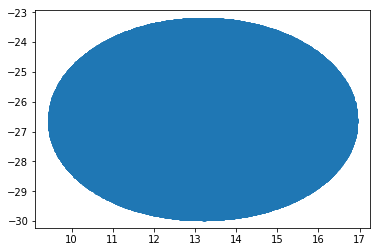

In [3]:
P_log = pd.read_csv('~/PanStarrsNGC288.csv')
print(shape(P_log))
P_log

P_log_ra = P_log.loc[:,"RAJ2000"]
P_log_dec = P_log.loc[:,"DEJ2000"]

P_log_gmag = P_log.loc[:,"gmag"]
P_log_rmag = P_log.loc[:,"rmag"]
P_log_imag = P_log.loc[:,"imag"]
P_log_zmag = P_log.loc[:,"zmag"]
P_log_ymag = P_log.loc[:,"ymag"]

P_log_gr = P_log_gmag-P_log_rmag
P_log_gi = P_log_gmag-P_log_imag
P_log_gz = P_log_gmag-P_log_zmag
P_log_gy = P_log_gmag-P_log_ymag

P_log_ri = P_log_rmag-P_log_imag
P_log_rz = P_log_rmag-P_log_zmag
P_log_ry = P_log_rmag-P_log_ymag

P_log_iz = P_log_imag-P_log_zmag
P_log_iy = P_log_imag-P_log_ymag

P_log_zy = P_log_zmag-P_log_ymag

# M=m-5(log(d)-1)
P_log_M_g = P_log_gmag-5*((np.log10(d_pc)) - 1)
P_log_M_r = P_log_rmag-5*((np.log10(d_pc)) - 1)
P_log_M_i = P_log_imag-5*((np.log10(d_pc)) - 1)
P_log_M_z = P_log_zmag-5*((np.log10(d_pc)) - 1)
P_log_M_y = P_log_ymag-5*((np.log10(d_pc)) - 1)

indx = (np.sqrt((np.fabs(P_log_ra-coord_ra_dec.ra.deg)**2+np.fabs(P_log_dec-coord_ra_dec.dec.deg)**2))\
        <Clust_Edge/60)

plt.scatter(P_log_ra, P_log_dec)
plt.show()

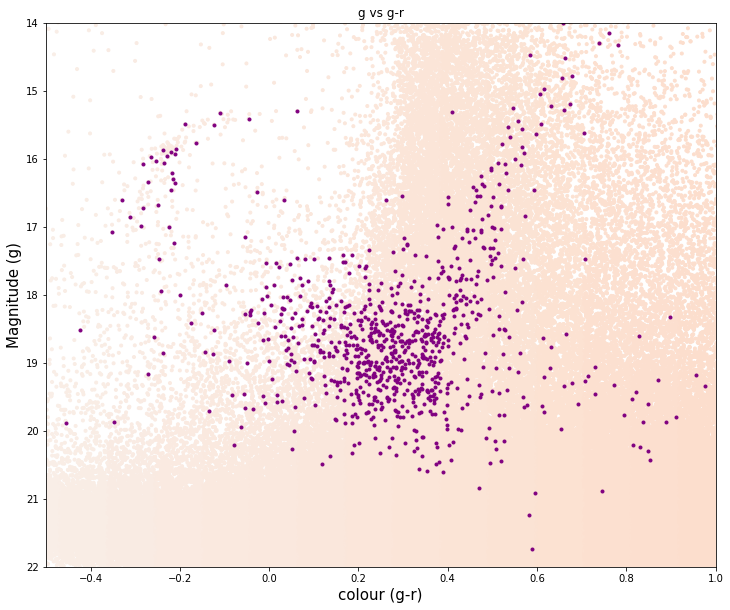

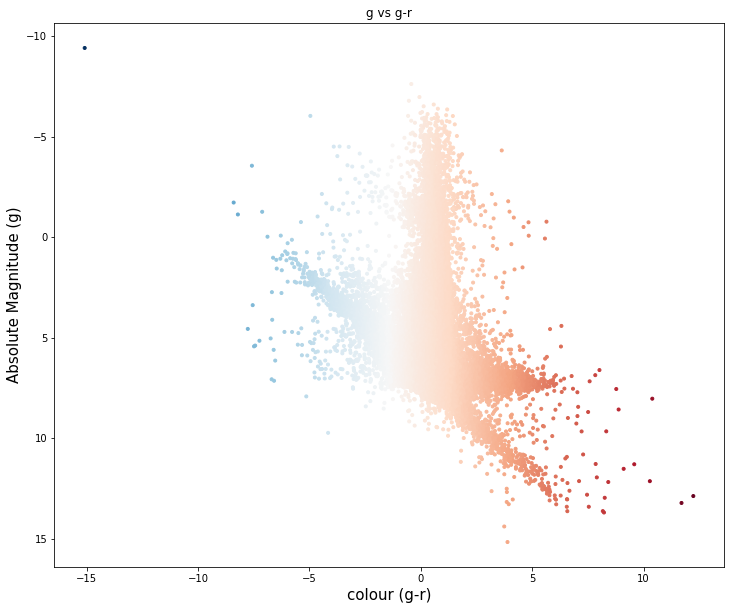

In [4]:
fig=plt.figure(figsize=(12,10))
plt.scatter(P_log_gr, P_log_gmag, marker='.', c=P_log_gr, cmap='RdBu_r')
plt.scatter(P_log_gr[indx], P_log_gmag[indx], marker='.', c='purple')
plt.gca().invert_yaxis()
plt.title('g vs g-r')
plt.xlabel('colour (g-r)', fontsize=15)
plt.ylabel('Magnitude (g)', fontsize=15)
#plt.legend()
#plt.gca().set_ylim([20.7, 18.7])
#plt.gca().set_xlim([0.15,0.52])
plt.gca().set_ylim([22, 14])
plt.gca().set_xlim([-0.5,1])
plt.show()

fig=plt.figure(figsize=(12,10))
plt.scatter(P_log_gr, P_log_M_g, marker='.', c=P_log_gr, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('g vs g-r')
plt.xlabel('colour (g-r)', fontsize=15)
plt.ylabel('Absolute Magnitude (g)', fontsize=15)
#plt.legend()
#plt.gca().set_ylim([20.7, 18.7])
#plt.gca().set_xlim([0.15,0.52])
#plt.gca().set_ylim([22, 14])
#plt.gca().set_xlim([-0.5,1])
plt.show()

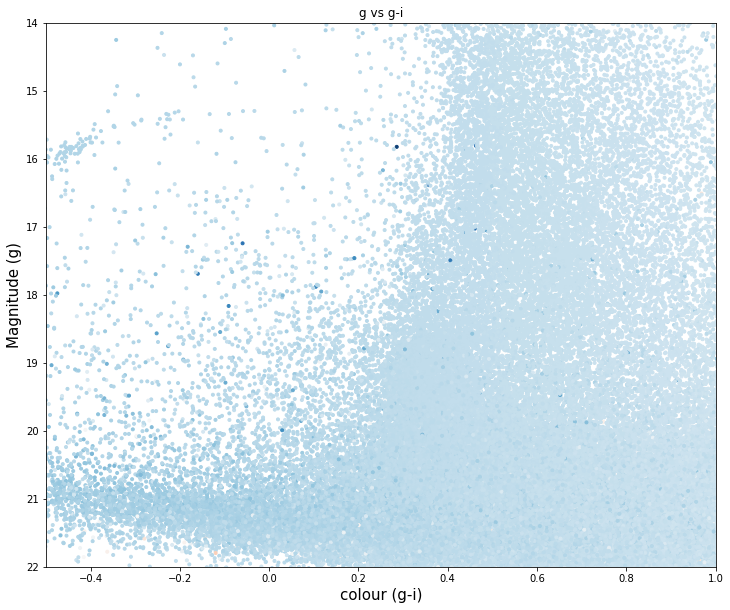

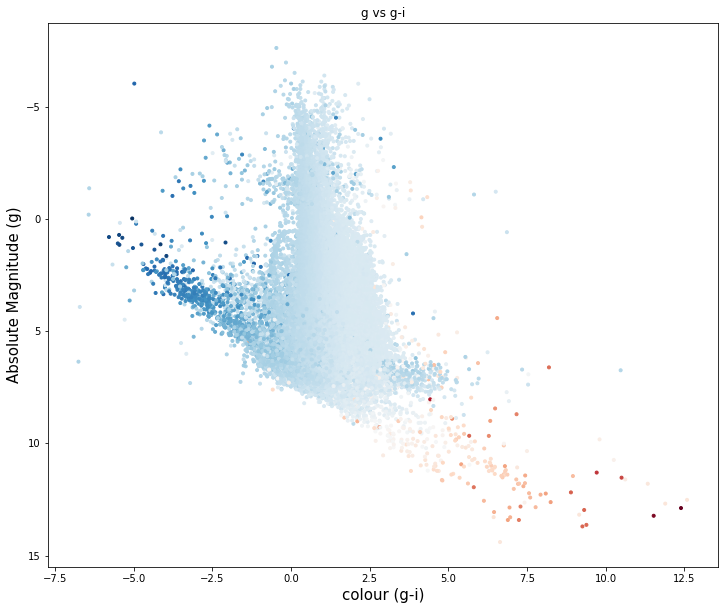

In [5]:
fig=plt.figure(figsize=(12,10))
plt.scatter(P_log_gi, P_log_gmag, marker='.', c=P_log_gr, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('g vs g-i')
plt.xlabel('colour (g-i)', fontsize=15)
plt.ylabel('Magnitude (g)', fontsize=15)
#plt.legend()
#plt.gca().set_ylim([20.7, 18.7])
#plt.gca().set_xlim([0.15,0.52])
plt.gca().set_ylim([22, 14])
plt.gca().set_xlim([-0.5,1])
plt.show()

fig=plt.figure(figsize=(12,10))
plt.scatter(P_log_gi, P_log_M_g, marker='.', c=P_log_gr, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('g vs g-i')
plt.xlabel('colour (g-i)', fontsize=15)
plt.ylabel('Absolute Magnitude (g)', fontsize=15)
#plt.legend()
#plt.gca().set_ylim([20.7, 18.7])
#plt.gca().set_xlim([0.15,0.52])
#plt.gca().set_ylim([22, 14])
#plt.gca().set_xlim([-0.5,1])
plt.show()

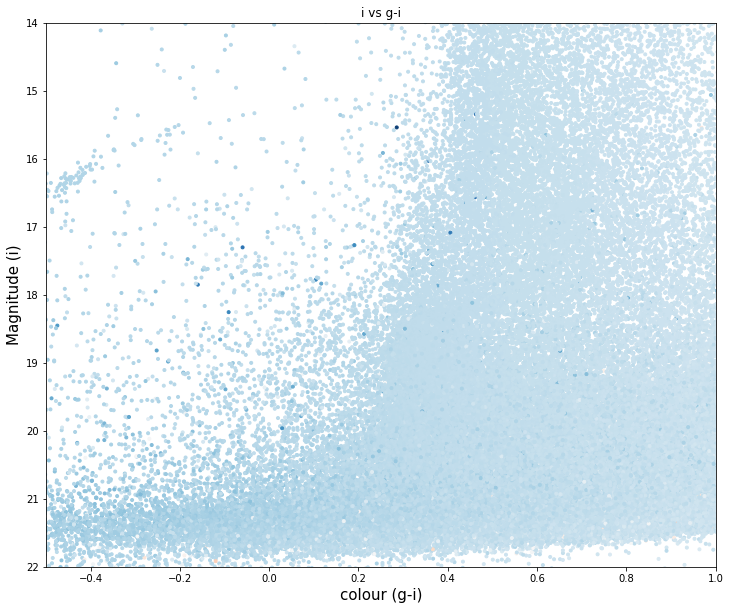

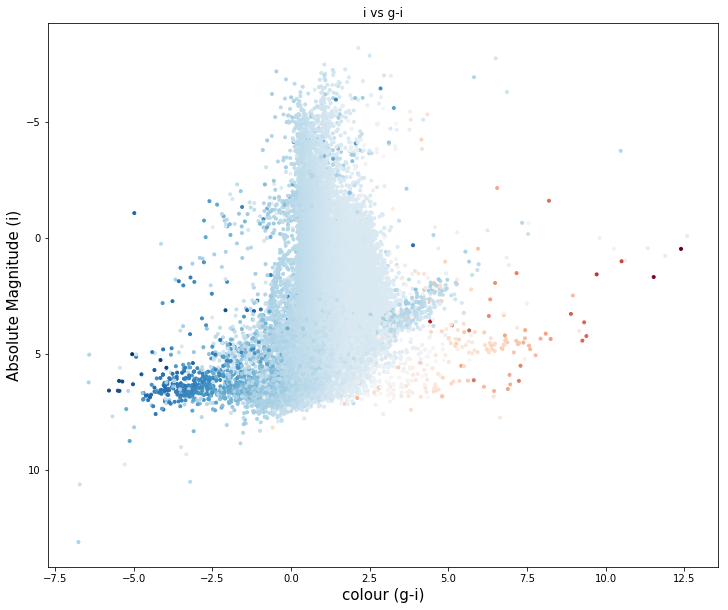

In [6]:
fig=plt.figure(figsize=(12,10))
plt.scatter(P_log_gi, P_log_imag, marker='.', c=P_log_gr, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('i vs g-i')
plt.xlabel('colour (g-i)', fontsize=15)
plt.ylabel('Magnitude (i)', fontsize=15)
#plt.legend()
#plt.gca().set_ylim([20.7, 18.7])
#plt.gca().set_xlim([0.15,0.52])
plt.gca().set_ylim([22, 14])
plt.gca().set_xlim([-0.5,1])
plt.show()

fig=plt.figure(figsize=(12,10))
plt.scatter(P_log_gi, P_log_M_i, marker='.', c=P_log_gr, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('i vs g-i')
plt.xlabel('colour (g-i)', fontsize=15)
plt.ylabel('Absolute Magnitude (i)', fontsize=15)
#plt.legend()
#plt.gca().set_ylim([20.7, 18.7])
#plt.gca().set_xlim([0.15,0.52])
#plt.gca().set_ylim([22, 14])
#plt.gca().set_xlim([-0.5,1])
plt.show()

core count: 1255
tidal count: 14738


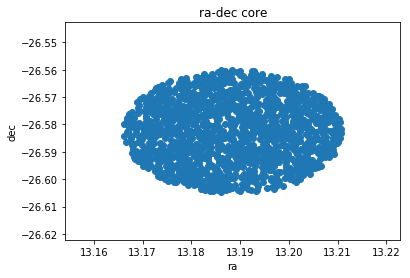

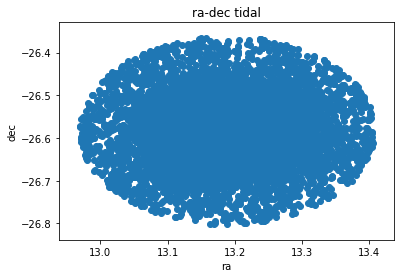

In [16]:
core_indx = (np.sqrt((np.fabs(P_log_ra.as_matrix()-coord_ra_dec.ra.deg)**2+\
                       np.fabs(P_log_dec.as_matrix()-coord_ra_dec.dec.deg)**2)) <= GlobClust_Log_r_c[0]/60)

tidal_indx = (np.sqrt((np.fabs(P_log_ra.as_matrix()-coord_ra_dec.ra.deg)**2+\
                       np.fabs(P_log_dec.as_matrix()-coord_ra_dec.dec.deg)**2)) <= GlobClust_Log_r_t[0]/60)

figure()
plt.scatter(P_log_ra[core_indx], P_log_dec[core_indx])
#plt.gca().set_xlim([11,17])
#plt.gca().set_ylim([-30,-23])
plt.title('ra-dec core')
plt.xlabel('ra')
plt.ylabel('dec')

figure()
plt.scatter(P_log_ra[tidal_indx], P_log_dec[tidal_indx])
#plt.gca().set_xlim([11,17])
#plt.gca().set_ylim([-30,-23])
plt.title('ra-dec tidal')
plt.xlabel('ra')
plt.ylabel('dec')


print('core count:', core_indx.sum())
print('tidal count:', tidal_indx.sum())




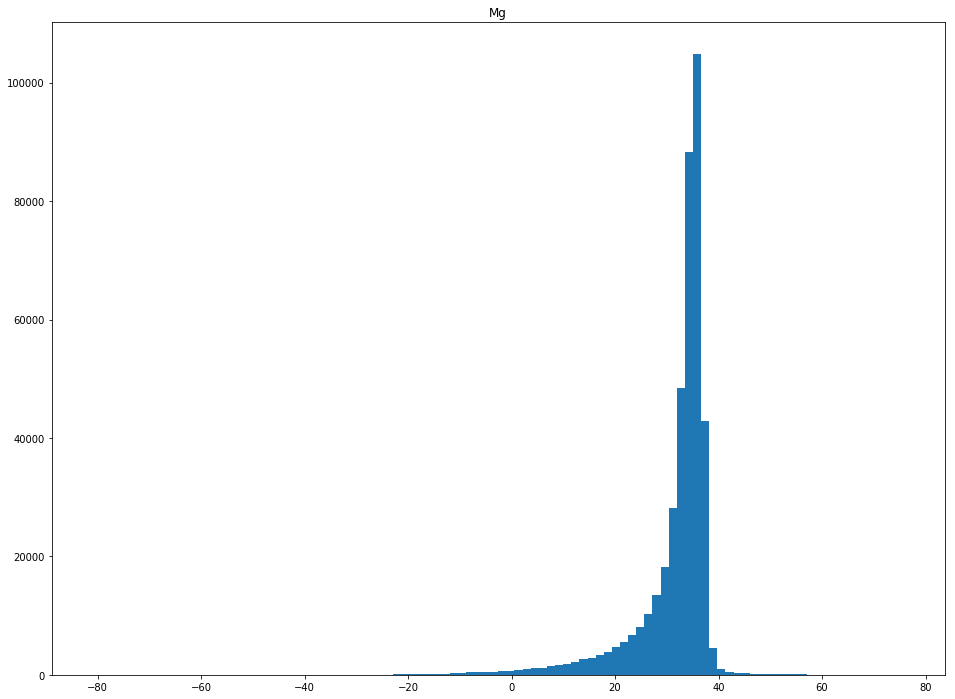

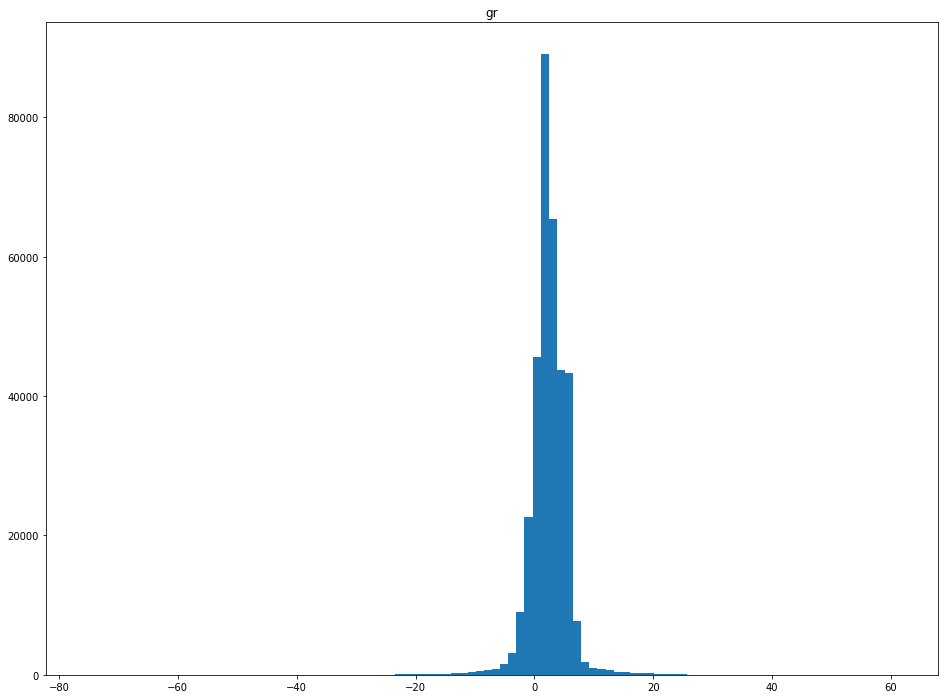

In [20]:
fig=plt.figure(figsize=(16,12))
plt.hist(P_log_M_g.dropna()/(1/5), bins=100)#, range=[-1.5,4.5])
plt.title('Mg')

fig=plt.figure(figsize=(16,12))
plt.hist(P_log_gr.dropna()/(1/5), bins=100)#, range=[0.1,1.3])
plt.title('gr')

614214


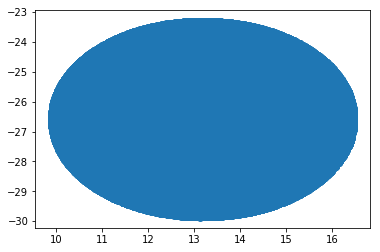

In [28]:
indx_lim = (np.sqrt((np.fabs(P_log_ra.as_matrix()-coord_ra_dec.ra.deg)**2+
                        np.fabs(P_log_dec.as_matrix()-coord_ra_dec.dec.deg)**2)) < Tidal_Edge/60*15)

plt.scatter(P_log_ra[indx_lim], P_log_dec[indx_lim])

print(sum(indx_lim))

/home/kaderali/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))

(135949, 15)
[-1 -1 -1 ... -1 -1 -1]
(135949,)
Estimated number of Subgroups: 14


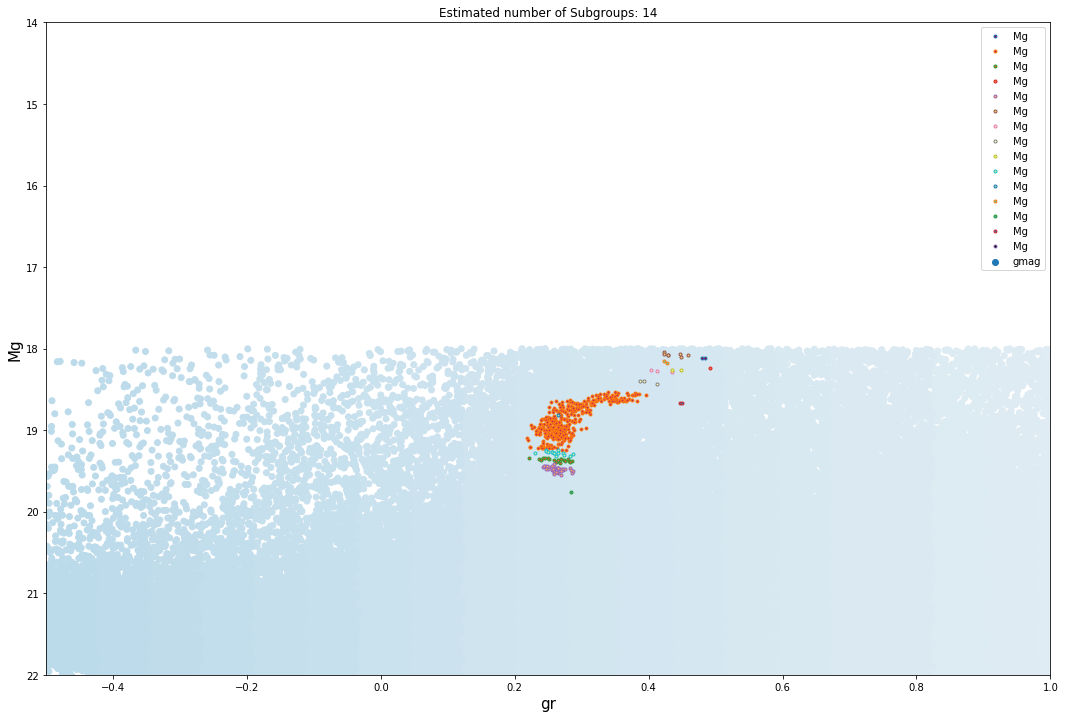

(452, 1)


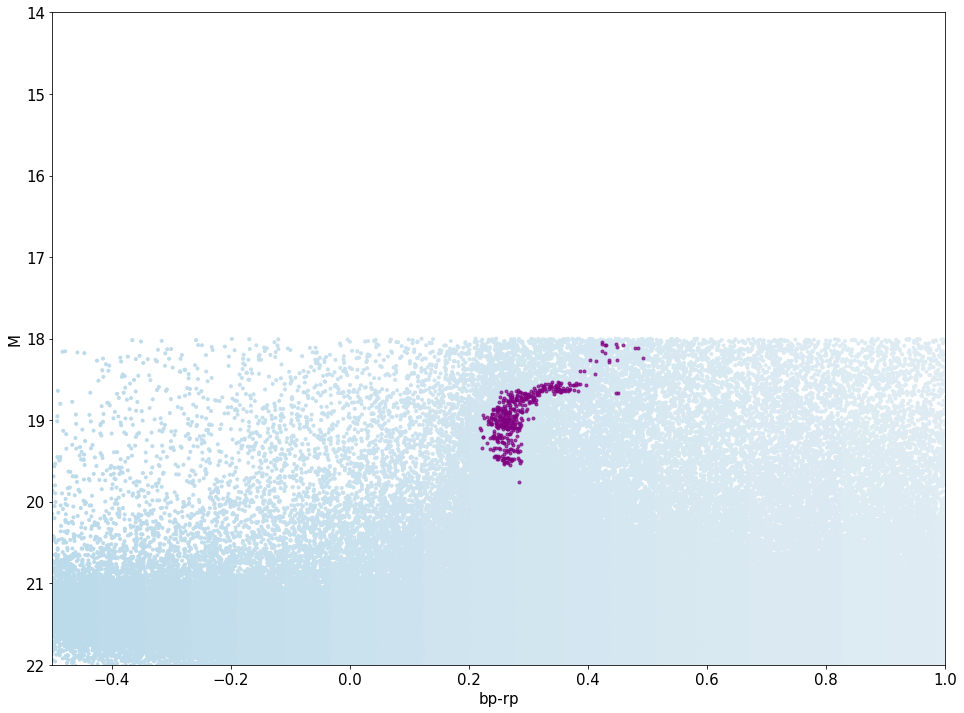

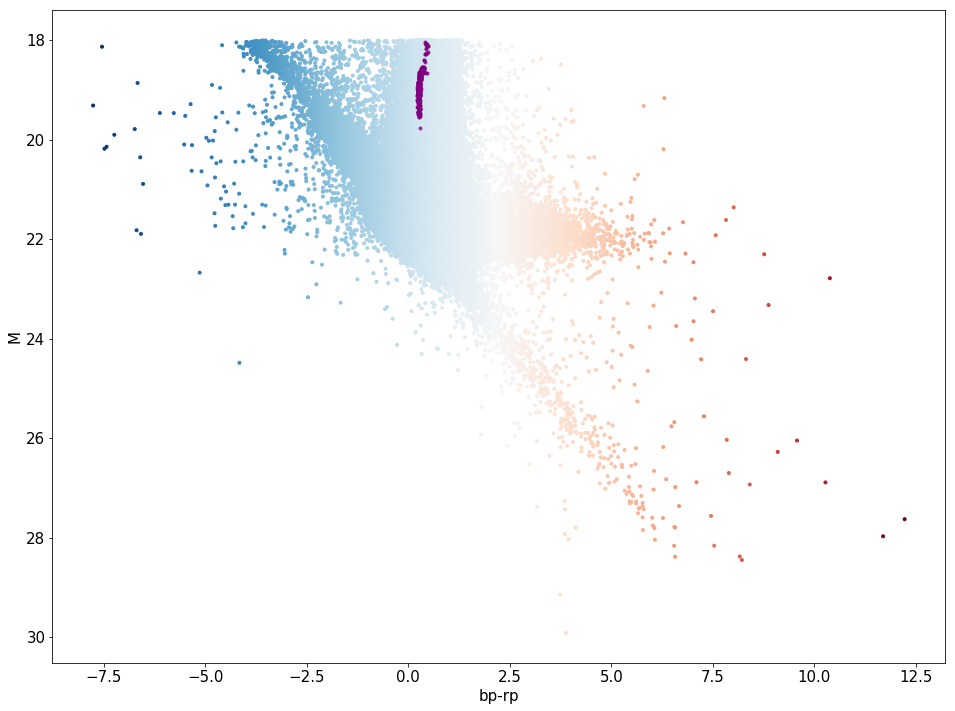

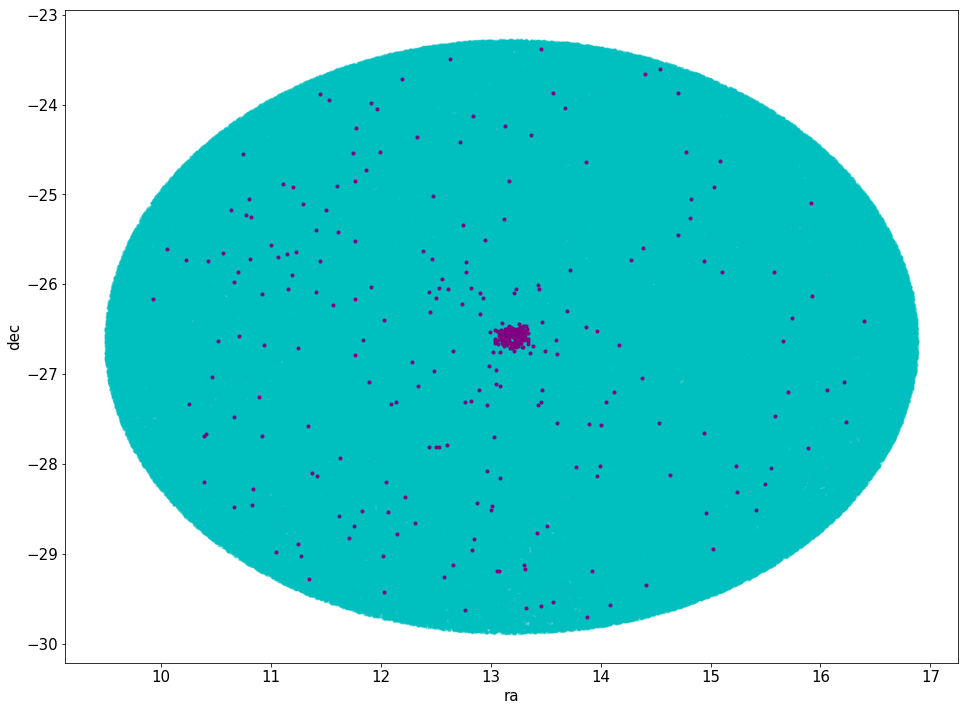

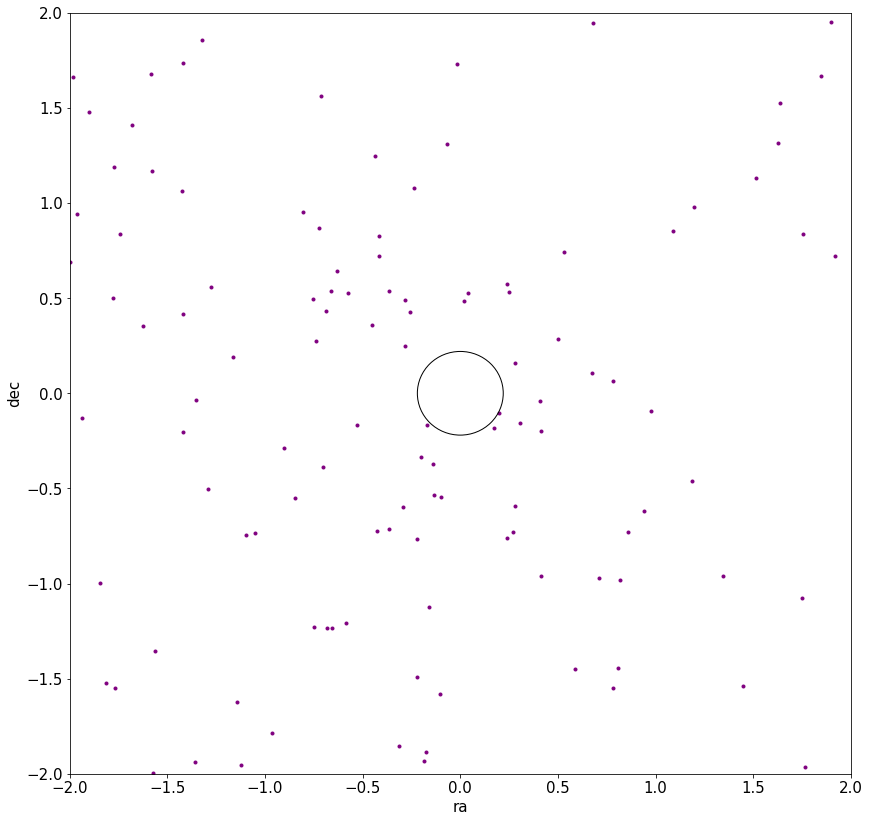

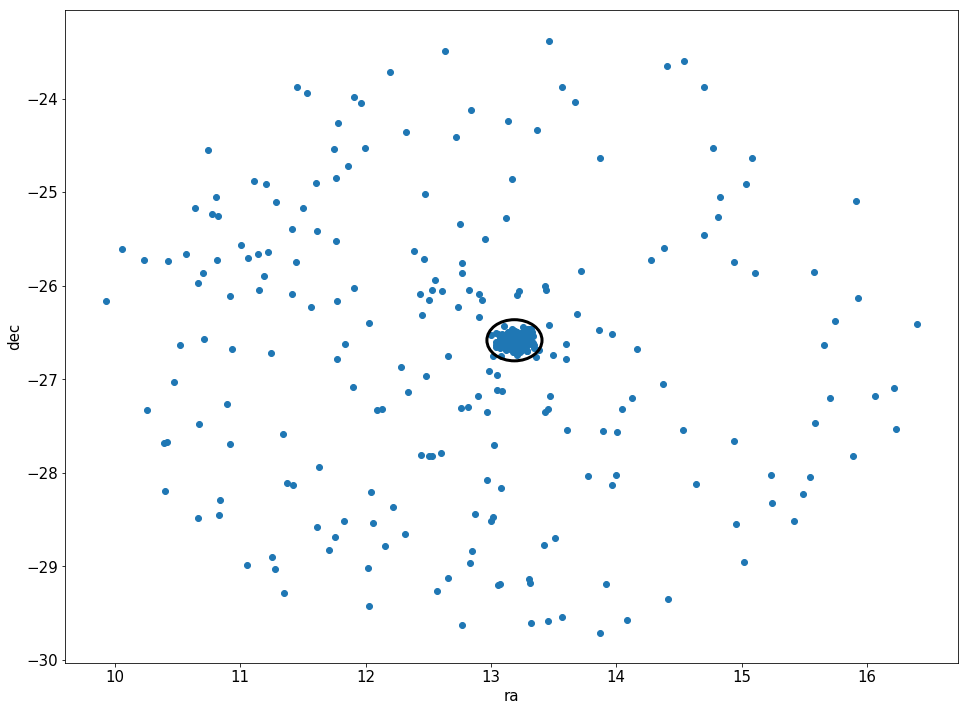

452 452
(452,)
[0.    0.006 0.012 0.018 0.024 0.03  0.036 0.042 0.048 0.054 0.06  0.066
 0.072 0.078 0.084 0.09  0.096]
(452, 1)


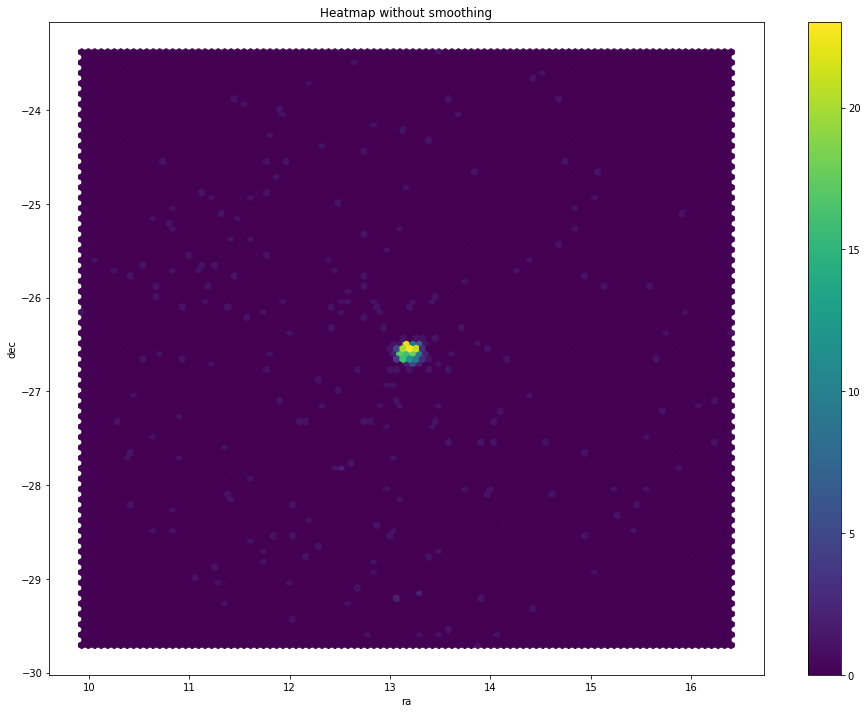

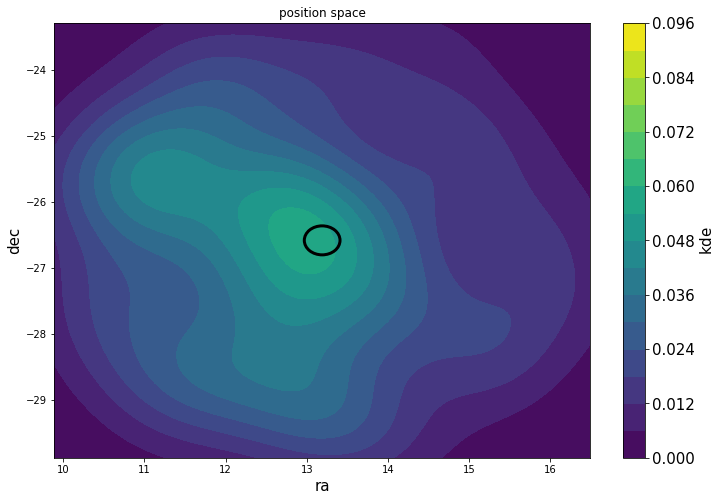

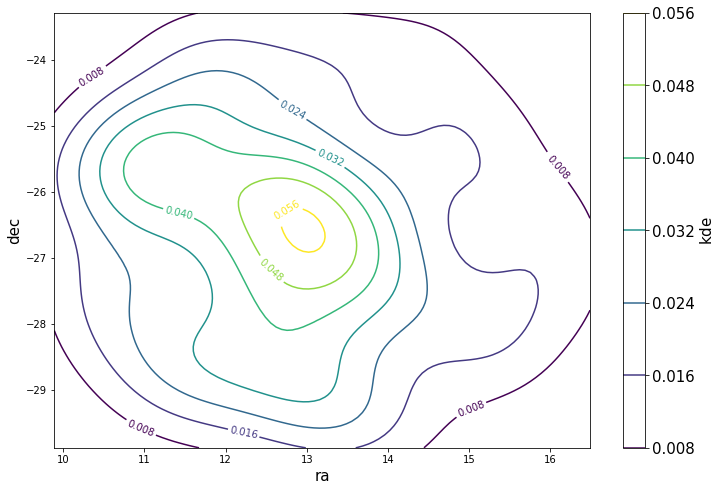

In [57]:
# DBSCAN
DB_Params =[]
DB_Params=np.transpose(DB_Params)

clust_edge2 = (np.sqrt((np.fabs(P_log_ra.as_matrix()-coord_ra_dec.ra.deg)**2+
                        np.fabs(P_log_dec.as_matrix()-coord_ra_dec.dec.deg)**2)) >Tidal_Edge/60)

indx_lim = (np.sqrt((np.fabs(P_log_ra.as_matrix()-coord_ra_dec.ra.deg)**2+
                        np.fabs(P_log_dec.as_matrix()-coord_ra_dec.dec.deg)**2)) < Tidal_Edge/60*15) * (P_log_gmag>18)


#pm_indx=(GlobClust_Log_pmra_error[parallax_indx]/np.fabs(GlobClust_Log_pmra[parallax_indx]) < 0.20) * \
#        (GlobClust_Log_pmdec_error[parallax_indx]/np.fabs(GlobClust_Log_pmdec[parallax_indx]) < 0.20) *\
#        (GlobClust_Log_vpu[parallax_indx] > 8) * (GlobClust_Log_aen[parallax_indx] == 0)

colour = P_log_gr[indx_lim]
Mag = P_log_gmag[indx_lim]
scale_m = 1
scale_c = 1

DF={'Mg': Mag/scale_m, 'gr': colour/scale_c,
    'Mr': P_log_rmag[indx_lim], 'Mi': P_log_imag[indx_lim], 'Mz': P_log_zmag[indx_lim], 'My': P_log_ymag[indx_lim],
    'gi': P_log_gi[indx_lim] , 'gz': P_log_gz[indx_lim] , 'gy': P_log_gy[indx_lim] , 'ri': P_log_ri[indx_lim] , 
    'rz': P_log_rz[indx_lim] , 'ry': P_log_ry[indx_lim] , 'iz': P_log_iz[indx_lim] , 'iy': P_log_iy[indx_lim] , 
    'zy': P_log_zy[indx_lim] } 

    #'pmra': P_log_pmra[parallax_indx]/50, 'pmdec': P_log_pmdec[parallax_indx]/50}

DB_Params = pd.DataFrame(data=DF)
DB_Params = DB_Params.dropna()

print(shape(DB_Params))


db=sklearn.cluster.DBSCAN(eps=0.08, min_samples=16, metric='euclidean', metric_params=None, algorithm='auto', 
                      leaf_size=30, p=None, n_jobs=1).fit(DB_Params) #original eps=0.1625

print(db.labels_)
print(shape(db.labels_))

fig=plt.figure(figsize=(18,12))
plt.scatter(colour/scale_c, Mag/scale_m, c=colour/scale_c, cmap='RdBu_r')
#plt.scatter(db,DB_Params)
#plt.show()

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of Subgroups: %d' % n_clusters_)

x_param3=[]
y_param3=[]

x_param4=[]
y_param4=[]

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    #NOISE
    #xy = DB_Params[class_member_mask & ~core_samples_mask]
    #plt.plot(xy.loc[:, "rpbp"], xy.loc[:, "M"], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=6)
    
    #CLEANED DATA
    xy = DB_Params[class_member_mask & core_samples_mask]
    
    plt.plot(xy.loc[:, "gr"], xy.loc[:, "Mg"], '.', markerfacecolor=tuple(col),)
     #       )#markeredgecolor='k')#, markersize=14)
    
    x_param3.append(xy.loc[:, "gr"]*scale_c)
    #y_param3=x_param3
    y_param3.append(xy.loc[:, "Mg"]*scale_m)

    #x_param4.append(xy.loc[:, "pmra"]*0.35)
    #y_param4.append(xy.loc[:, "pmdec"]*0.3)
    
    #x_param5.append(xy.loc[:, "ra"]*0.35)
    #y_param5.append(xy.loc[:, "dec"]*0.3)

plt.gca().invert_yaxis()
plt.title('Estimated number of Subgroups: %d' % n_clusters_)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
plt.xlabel('gr', fontsize=15)
plt.ylabel('Mg', fontsize=15)
plt.gca().set_ylim([22, 14])
plt.gca().set_xlim([-0.5,1])

plt.legend()
plt.show()
#fig.savefig('GC_DBSCAN'+ GlobClust_Log_ID[0] +'eps0p165-mins10_coreCMD-fullsetiponfullcmd.png')

x_out3 = pd.DataFrame(x_param3)#, index=None)#, mangle_dupe_cols=True)
#x_out3.reset_index()
x_out3 = x_out3.transpose() 
x_out3 = x_out3.loc[:,~x_out3.columns.duplicated()]
#x_out3 = x_out3["rpbp"].as_matrix()
x_out3

y_out3 = pd.DataFrame(y_param3)#, index=None)#, mangle_dupe_cols=True)
#y_out3.reset_index()
y_out3 = y_out3.transpose() 
y_out3 = y_out3.loc[:,~y_out3.columns.duplicated()]
#y_out3 = y_out3["M"].as_matrix()
print(shape(y_out3))

GC_ra = pd.DataFrame({'ra':P_log_ra})
GC_dec = pd.DataFrame({'dec':P_log_dec})
#GC_pmra = pd.DataFrame({'pmra':GlobClust_Log_pmra})
#GC_pmdec = pd.DataFrame({'pmdec':GlobClust_Log_pmdec})

ra_DB = GC_ra.reindex(x_out3.index)
dec_DB = GC_dec.reindex(y_out3.index)
#pmra_DB = GC_pmra.reindex(x_out3.index)
#pmdec_DB = GC_pmdec.reindex(y_out3.index)
M_DB = Mag.reindex(y_out3.index)
rpbp_DB = colour.reindex(y_out3.index)

#pmra_DB_norm = (pmra_DB-pmra_DB.mean())#/(pmra_DB.mean())
#pmdec_DB_norm = (pmdec_DB-pmdec_DB.mean())#/(pmdec_DB.mean())

#print('\n', pmra_DB.mean(), '\n')
#print('\n', pmdec_DB.mean())

fig=plt.figure(figsize=(16,12))
plt.scatter(x=colour, y=Mag, c=colour, cmap='RdBu_r', marker='.')
plt.scatter(x=rpbp_DB, y=M_DB, c='purple', alpha=0.7, marker='.')
#plt.scatter(x=rpbp_ic, y=M_ic, c='g', alpha=0.2, marker='.')
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.gca().invert_yaxis()
plt.gca().set_ylim([22, 14])
plt.gca().set_xlim([-0.5,1])
plt.show()

fig=plt.figure(figsize=(16,12))
plt.scatter(x=colour, y=Mag, c=colour, cmap='RdBu_r', marker='.')
plt.scatter(x=rpbp_DB, y=M_DB, c='purple', alpha=0.7, marker='.')
#plt.scatter(x=rpbp_ic, y=M_ic, c='g', alpha=0.2, marker='.')
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.gca().invert_yaxis()
plt.show()

fig=plt.figure(figsize=(16,12))
plt.scatter(x=P_log_ra, y=P_log_dec, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB, y=dec_DB, c='purple', marker='.')#, alpha=0.2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

#fig=plt.figure(figsize=(16,12))
##plt.hexbin(GlobClust_Log_pmdec_out, GlobClust_Log_pmra_out, extent=[-10,10, -10,10], bins='log',gridsize=200)
#plt.scatter(x=GlobClust_Log_pmra_out[parallax_indx][pm_indx] , y=GlobClust_Log_pmdec_out[parallax_indx][pm_indx], c='c', alpha=0.3, marker='.')
##plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
#plt.scatter(y=pmdec_DB, x=pmra_DB, c='purple', marker='.')#, alpha=0.2)
#plt.xlabel('pmra', fontsize=15)
#plt.ylabel('pmdec', fontsize=15)
##plt.gca().invert_yaxis()
##plt.title('CMD of ' + GC_IDs[i], fontsize=15)
##cb=plt.colorbar()
##cb.ax.tick_params(labelsize=15)
##cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
#plt.gca().tick_params(labelsize=15)
##plt.gca().set_ylim([-7.5, -4.5])
##plt.gca().set_xlim([2.5,6])
#plt.gca().set_ylim([-10,10])
#plt.gca().set_xlim([-10,10])
##plt.gca().set_ylim([3.2, 4.7])
##plt.gca().set_xlim([-7.5,-3])
#plt.show()

clust_indx = (np.sqrt((np.fabs(ra_DB.as_matrix()-coord_ra_dec.ra.deg)**2+np.fabs(dec_DB.as_matrix()-coord_ra_dec.dec.deg)**2))
              >Tidal_Edge/60)
#(np.sqrt(np.fabs((ra_DB-coord_ra_dec.ra.deg)**2+(dec_DB-coord_ra_dec.dec.deg)**2))<Clust_Edge/60)


fig=plt.figure(figsize=(14,14))
ax = plt.gca()
#plt.scatter(x=GlobClust_Log_pmra_out, y=GlobClust_Log_pmdec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB[clust_indx]-coord_ra_dec.ra.deg, y=dec_DB[clust_indx]-coord_ra_dec.dec.deg, c='purple', marker='.')#, alpha=0.2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
circle = plt.Circle((0,0), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=2)
#ax.add_artist(circle)
circle2 = plt.Circle((0,0), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=1)
ax.add_artist(circle2)
circle3 = plt.Circle((0,0), 5/60, color='pink', fill=False, lw=2)
#ax.add_artist(circle3)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().set_ylim([-2, 2])
plt.gca().set_xlim([-2,2])
plt.gca().tick_params(labelsize=15)
plt.show()


fig=plt.figure(figsize=(16,12))
ax = plt.gca()
#plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB, y=dec_DB)#, c=pmra_DB_norm, cmap='inferno_r', marker='.', vmin=-1, vmax=1)#, alpha=0.2)
#plt.scatter(x=ra_DB, y=dec_DB, c=pmdec_DB_norm, cmap='inferno', marker='.', vmin=-1, vmax=1)#, alpha=0.2)
circle = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=5)
#ax.add_artist(circle)
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=3)
ax.add_artist(circle2)
circle3 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), 5/60, color='pink', fill=False, lw=2)
#ax.add_artist(circle3)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmra}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

#fig=plt.figure(figsize=(16,12))
#ax = plt.gca()
##plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
##plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
#plt.scatter(x=ra_DB, y=dec_DB, c=pmdec_DB_norm, cmap='inferno_r', marker='o', s=100, vmin=-1, vmax=1)#vmin=-0.1, vmax=.1)#, alpha=0.2)
#circle = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=5)
##ax.add_artist(circle)
#circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=3)
#ax.add_artist(circle2)
#circle3 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), 5/60, color='pink', fill=False, lw=2)
##ax.add_artist(circle3)
#plt.xlabel('ra', fontsize=15)
#plt.ylabel('dec', fontsize=15)
##plt.gca().invert_yaxis()
##plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
#plt.gca().tick_params(labelsize=15)
#plt.show()

#fig=plt.figure(figsize=(16,12))
#ax = plt.gca()
##plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
##plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
#plt.scatter(x=ra_DB, y=dec_DB, c=pmdec_DB_norm, cmap='cool', marker='o', vmin=-0.01, vmax=0.01)#vmin=-0.1, vmax=.1)#, alpha=0.2)
#circle = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t/60*4, color='b', fill=False, lw=5)
#ax.add_artist(circle)
#circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=3)
#ax.add_artist(circle2)
#circle3 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), 5/60, color='pink', fill=False, lw=2)
##ax.add_artist(circle3)
#plt.xlabel('ra', fontsize=15)
#plt.ylabel('dec', fontsize=15)
##plt.gca().invert_yaxis()
##plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
#plt.gca().tick_params(labelsize=15)
#plt.show()

x=ra_DB[~numpy.isnan(ra_DB)]
y=dec_DB[~numpy.isnan(dec_DB)]
x=np.array(x)
y=np.array(y)
print(len(x),len(y))
print(x[:,0].shape)

fig=plt.figure(figsize=(16,12))
# normal distribution center at x=0 and y=5
plt.hexbin(x[:,0], y[:,0])#, C=pmra_DB_norm, cmap='inferno', gridsize=50,vmin=-1,vmax=1)#, extent=[11,17,  -23,-29])
plt.colorbar()
plt.title('Heatmap without smoothing')
plt.ylabel("dec")
plt.xlabel("ra")

#fig=plt.figure(figsize=(16,12))
## normal distribution center at x=0 and y=5
#plt.hexbin(x[:,0], y[:,0], C=pmdec_DB_norm, cmap='inferno', gridsize=50,vmin=-1,vmax=1)#, extent=[11,17,  -23,-29])
#plt.colorbar()
#plt.title('Heatmap without smoothing')
#plt.ylabel("dec")
#plt.xlabel("ra")

#pmra_kde=pmra_DB[clust_indx].as_matrix()
#pmdec_kde=pmdec_DB[clust_indx].as_matrix()
#print(shape(pmdec_kde))
##pmra_kde=pmra_DB.as_matrix()
##pmdec_kde=pmdec_DB.as_matrix()
##print(shape(pmdec_kde))

ra_kde=ra_DB[clust_indx].as_matrix()
dec_kde=dec_DB[clust_indx].as_matrix()
#print(shape(pmdec_kde))
#ra_kde=ra_DB.as_matrix()
#dec_kde=dec_DB.as_matrix()
#print(shape(pmdec_kde))

#pmra_kde_1 = 0-10 
#pmra_kde_2 = 0+10
#pmdec_kde_1 = 0-10
#pmdec_kde_2 = 0+10

r_t = GlobClust_Log_r_t.as_matrix()
r_t = r_t[0]

ra_kde_1 = coord_ra_dec.ra.deg-r_t/60*15
ra_kde_2 = coord_ra_dec.ra.deg+r_t/60*15
dec_kde_1 = coord_ra_dec.dec.deg-r_t/60*15
dec_kde_2 = coord_ra_dec.dec.deg+r_t/60*15

findx=(np.isfinite(ra_kde))*(np.isfinite(dec_kde))*(ra_kde<ra_kde_2)*(ra_kde>ra_kde_1)*(dec_kde>dec_kde_1)*(dec_kde<dec_kde_2)

from scipy import stats
from matplotlib import colors, ticker, cm

#pmra_kde=pmra_DB.as_matrix()[findx]
#pmdec_kde=pmdec_DB.as_matrix()[findx]

#pmra_kde=pmra_DB.dropna().as_matrix()
#pmdec_kde=pmdec_DB.dropna().as_matrix()


#KDE part
k = stats.gaussian_kde([ra_kde[findx], dec_kde[findx]], )
xi, yi = np.mgrid[ra_kde_1:ra_kde_2:100*1j, 
                  dec_kde_1:dec_kde_2:100*1j]
#xi, yi = np.mgrid[12:14:100*1j, 
#                  -28:-26:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

contours = np.arange(0,0.1, 0.006)
print(contours)

fig=plt.figure(figsize=(12,8))
ax=plt.gca()
plt.contourf(xi, yi, zii , levels=contours)#[0,0.025,0.05,0.075,0.1])# locator=ticker.LogLocator())
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=3)
ax.add_artist(circle2)
plt.title('position space')
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)

#KDE part
#k = stats.gaussian_kde([pmra_kde[findx], pmdec_kde[findx]], )
#xi, yi = np.mgrid[2.5:6:100*1j, 
#                  -7.5:-4:100*1j]
##print(xi,yi,k)
#zi = k(np.vstack([xi.flatten(), yi.flatten()]))
#zii=zi.reshape(xi.shape)

#fig=plt.figure(figsize=(12,8))
#plt.contourf(xi, yi, zii ,)# locator=ticker.LogLocator())
#plt.title('proper motion space')
#plt.xlabel('pmra', fontsize=15)
#plt.ylabel('pmdec', fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{kde}$',fontsize=15)


#pmra_kde=pmra_DB[clust_indx].as_matrix()
#pmdec_kde=pmdec_DB[clust_indx].as_matrix()

print(shape(clust_indx))

#pmra_kde=pmra_DB.as_matrix()
#pmdec_kde=pmdec_DB.as_matrix()

#pmra_kde_1 = 0-10 
#pmra_kde_2 = 0+10
#pmdec_kde_1 = 0-10
#pmdec_kde_2 = 0+10

#findx=(np.isfinite(pmra_kde))*(np.isfinite(pmdec_kde))#*(pmra_kde<2.*np.pi)*(pmra_kde>0.)*(pmdec_kde>-1.)*(pmdec_kde<1.)
findx=(np.isfinite(ra_kde))*(np.isfinite(dec_kde))#*(pmra_kde<2.*np.pi)*(pmra_kde>0.)*(pmdec_kde>-1.)*(pmdec_kde<1.)

from scipy import stats
from matplotlib import colors, ticker, cm

#pmra_kde=pmra_DB.as_matrix()[findx]
#pmdec_kde=pmdec_DB.as_matrix()[findx]

#pmra_kde=pmra_DB.dropna().as_matrix()
#pmdec_kde=pmdec_DB.dropna().as_matrix()

r_t = GlobClust_Log_r_t.as_matrix()
r_t = r_t[0]

#ra_kde_1 = 0-r_t/60*15
#ra_kde_2 = 0+r_t/60*15
#dec_kde_1 = 0-r_t/60*15
#dec_kde_2 = 0+r_t/60*15

#lev_exp = np.arange(np.floor(np.log10(pmra_DB_norm[~numpy.isnan(pmra_DB_norm)]).min()-1),
#                    np.ceil(np.log10(pmra_DB_norm[~numpy.isnan(pmra_DB_norm)]).max()+1))
#levs = np.power(10, lev_exp)

#print(shape(pmra_kde[findx]))


#KDE part
#k = stats.gaussian_kde([pmra_kde[findx], pmdec_kde[findx]], )
#xi, yi = np.mgrid[2.5:6:100*1j, 
#                  -7.5:-4:100*1j]
#print(xi,yi,k)
#zi = k(np.vstack([xi.flatten(), yi.flatten()]))
#zii=zi.reshape(xi.shape)

#fig=plt.figure(figsize=(12,8))
#CS=plt.contour(xi, yi, zii, )# levs, norm=colors.LogNorm())#locator=ticker.LogLocator())
#plt.xlabel('pmra', fontsize=15)
#plt.ylabel('pmdec', fontsize=15)
#plt.clabel(CS, inline=1, fontsize=10, )
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{kde}$',fontsize=15)

#KDE part
k = stats.gaussian_kde([ra_kde[findx], dec_kde[findx]], )
xi, yi = np.mgrid[ra_kde_1:ra_kde_2:100*1j, 
                  dec_kde_1:dec_kde_2:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

fig=plt.figure(figsize=(12,8))
CS=plt.contour(xi, yi, zii )#, levs, norm=colors.LogNorm())#locator=ticker.LogLocator())
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
plt.clabel(CS, inline=1, fontsize=10, )
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)
